## A Small Project of Machine Learning

In [1]:
# import required packages or modules
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Step 1: Import the Data

In [2]:
music_data = pd.read_csv("music.csv")
music_data.head()

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz


### Step 2: Cleaning/Preparing the Data

In [3]:
X = music_data.drop(columns = ['genre'])
X.head()

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1


In [4]:
y = music_data['genre']
y.head()

0    HipHop
1    HipHop
2    HipHop
3      Jazz
4      Jazz
Name: genre, dtype: object

### Step 3: Split the data into training/test sets

Note that the split test and train datasets would be different every time.


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)


### Step 4: Create a model and Train the model

In [6]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

### Step 5: Make predictions

In [7]:
predictions = model.predict(X_test)
predictions

array(['Jazz', 'Acoustic', 'HipHop', 'Dance'], dtype=object)

### Step 6: Evaluate and Improve

In [8]:
score = accuracy_score(y_test, predictions)
score 

1.0

### Additional but Important: Save the trained model for future loading

If the training dataset is huge, it would require long time to train the model. Saving the trained model can save time for future usage. 


In [9]:
import joblib
joblib.dump(model, 'model_music.pkl')

['model_music.pkl']

In [10]:
# load the model in the future
model1 = joblib.load('model_music.pkl')
predictions1 = model1.predict([[21,1]])
predictions1

/Users/Jessie/anaconda3/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['HipHop'], dtype=object)

### Visualize Decision Tree


In [11]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

music_data = pd.read_csv("music.csv")
X = music_data.drop(columns = ['genre']) 
y = music_data['genre']
model = DecisionTreeClassifier()
model.fit(X,y)
tree.export_graphviz(model, out_file="music-recommender.dot", feature_names=['age', 'gender'],
                     class_names =sorted(y.unique()), label="all", rounded = True, filled = True)


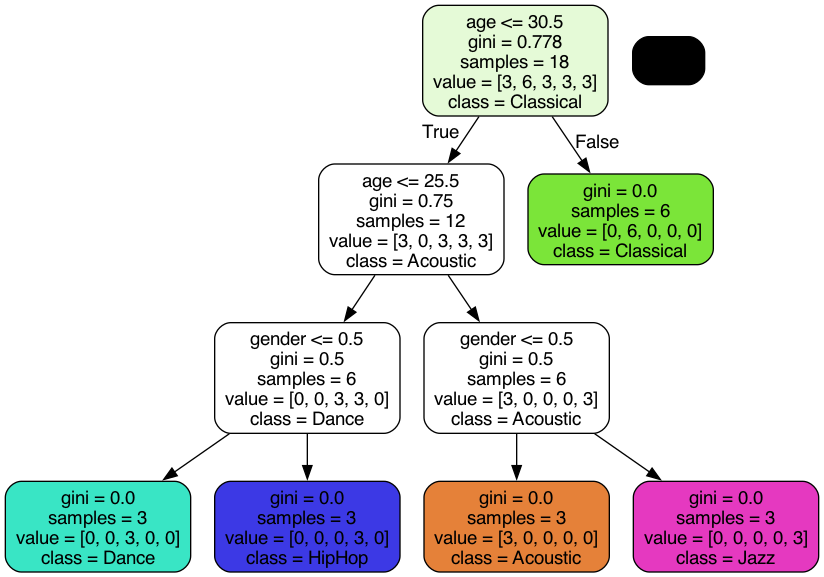

In [12]:
# Display the decision tree
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

# Load the dot file
with open("music-recommender.dot") as f:
    dot_graph = f.read()

graph = pydotplus.graph_from_dot_data(dot_graph)
Image(graph.create_png())
